<a href="https://colab.research.google.com/github/tortolla/neuromorphy/blob/main/impulse_aprox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#считываем данные графика из файла

import numpy as np
import matplotlib as plt

def read_arrays_from_file(filename):
    array1 = np.array(())
    array2 = np.array(())

    with open(filename, 'r') as file:
        for line in file:
            values = line.split()
            if len(values) == 2:
                array1 = np.append(array1, float(values[0]))
                array2 = np.append(array2, float(values[1]))


    return array1, array2


filename = '/content/calibration1.txt'
array1, array2 = read_arrays_from_file(filename)
print(array1)
print(array2)


[0.13679683 0.13695985 0.13701172 ... 0.08749135 0.08556478 0.08504609]
[1.46232128e-01 3.42893124e-01 5.38884878e-01 ... 1.49467019e+04
 1.49478449e+04 1.49489962e+04]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Единичный импульс')

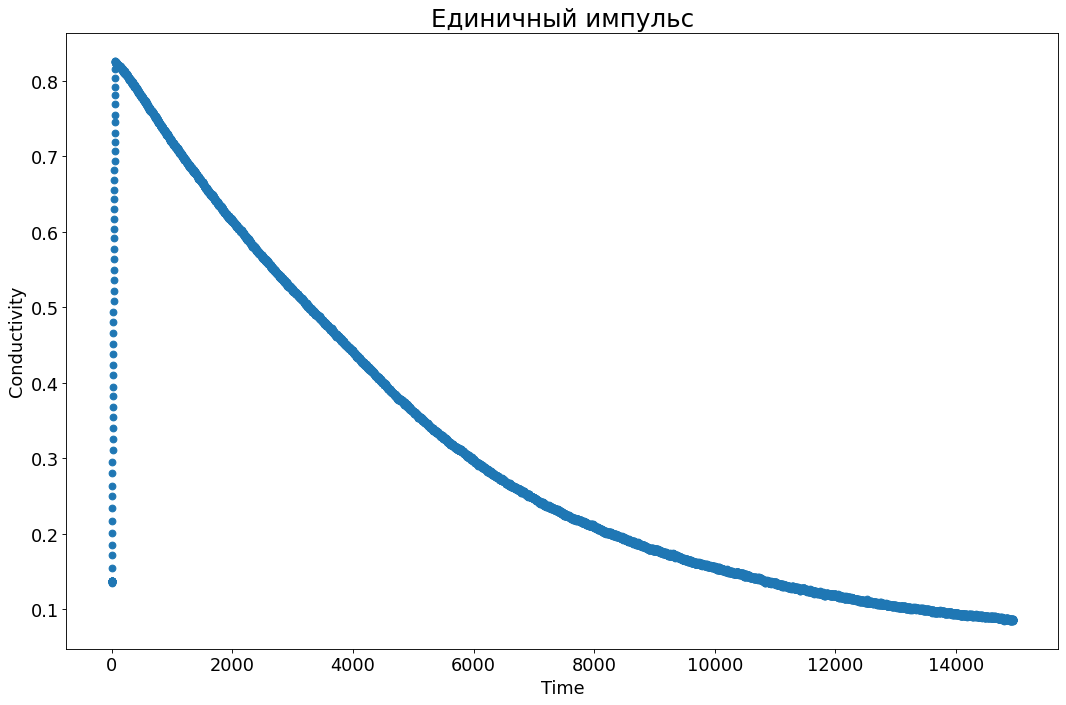

In [8]:
#строим график единичного импульса
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')


large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)

fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.scatter(array2, array1) #array2 - time
plt.gca().set(xlabel = 'Time', ylabel = 'Conductivity')
plt.title("Единичный импульс", fontsize=22)

Text(0.5, 1.0, 'Релаксация')

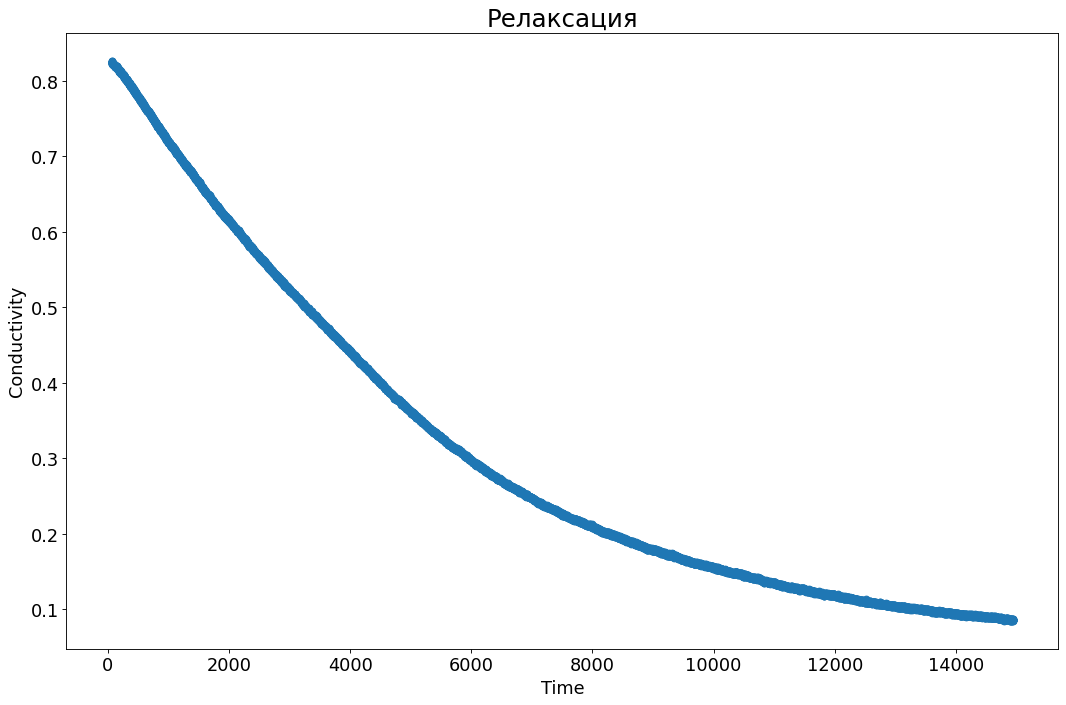

In [22]:
index = array1.argmax(axis=0)

array1 = array1[index:]
array2 = array2[index:]
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.scatter(array2, array1)
plt.gca().set(xlabel = 'Time', ylabel = 'Conductivity')
plt.title("Релаксация", fontsize=22)

In [49]:
from scipy.optimize import curve_fit

def double_exponential_approximation(x, y):
    # Определение функции аппроксимации
    def func(x, A0, A, B, C, D):
        return A0 + A * np.exp(B * (-x)) + C * np.exp(D * (-x))

    # Аппроксимация значений y
    popt, _ = curve_fit(func, x, y, p0=[0, 1, 0.002, 0.01, 0.01])

    # Построение графика
    plt.scatter(x, y, label='Данные')
    plt.plot(x, func(x, *popt), 'r', label='Аппроксимация')
    plt.xlabel('Time')
    plt.ylabel('Conductivity')
    plt.title("Апроксимация релаксации", fontsize=22)
    plt.legend()
    plt.show()

    # Вывод коэффициентов аппроксимирующей кривой
    return popt

<ipython-input-49-08b76c2ce90f>:6: RuntimeWarning: overflow encountered in exp
  return A0 + A * np.exp(B * (-x)) + C * np.exp(D * (-x))


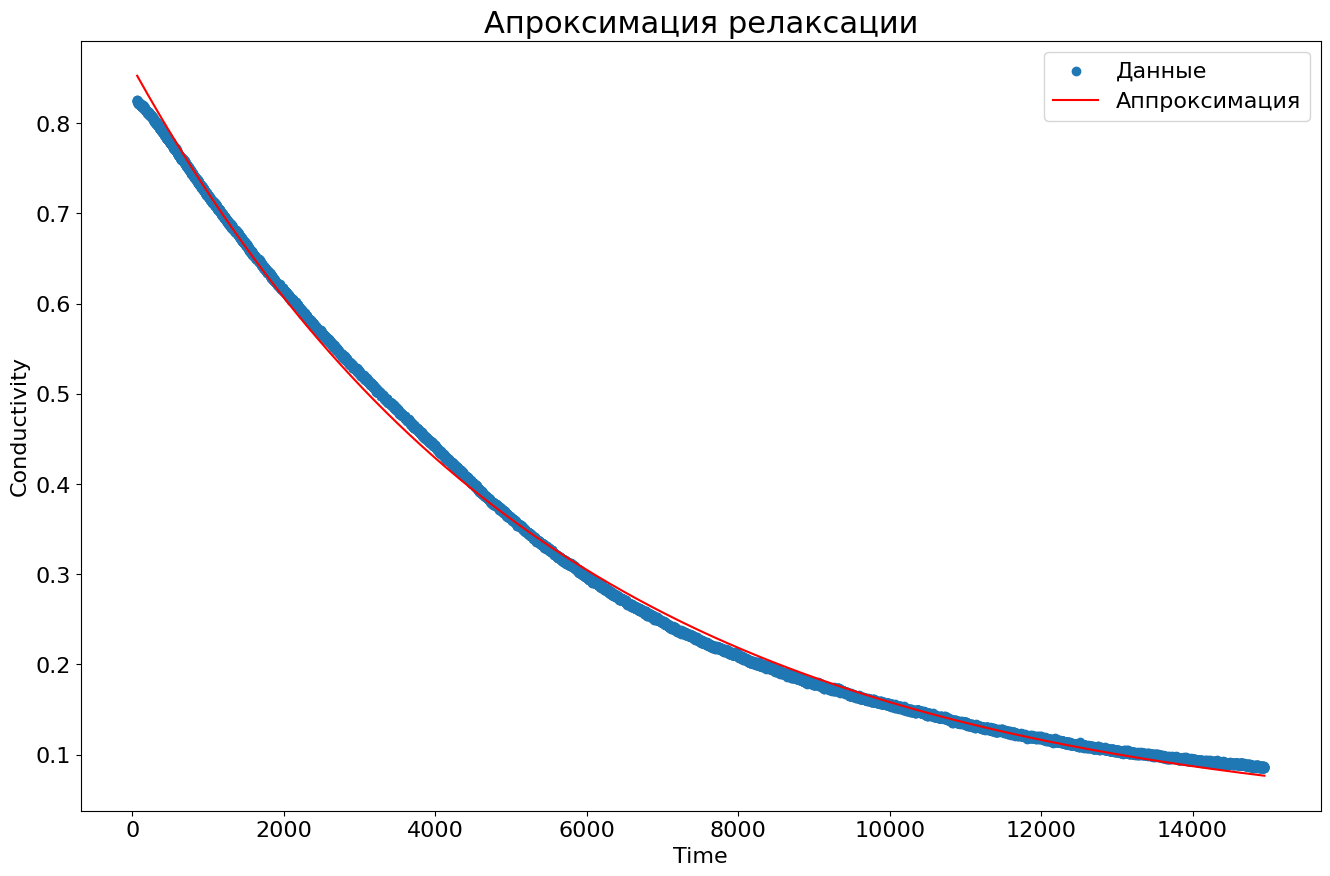

array([2.01082591e-02, 5.74878966e-01, 1.80763051e-04, 2.67074499e-01,
       1.80760634e-04])

In [50]:
double_exponential_approximation(array2, array1)